# Chapter 5 - Data visualization essentials
2022 August 26

<a target="_blank" href="https://colab.research.google.com/github/EastBayEv/SSDS-TAML/blob/main/fall2022/5_Data_visualization_essentials.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![viz](img/viz.png)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make sure plots show in the notebook
%matplotlib inline

/Users/evanmuzzall/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


After importing data, you should examine it closely. 

1. Look at the raw data and perform rough checks of your assumptions
2. Compute summary statistics
3. Produce visualizations to illustrate obvious - or not so obvious - trends in the data

## First, a note about matplotlib
There are many different ways to visualize data in Python but they virtually all rely on matplotlib. You should take some time to read through the tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. 

Because many other libraries depend on matplotlib under the hood, you should familiarize yourself with the basics. For example: 

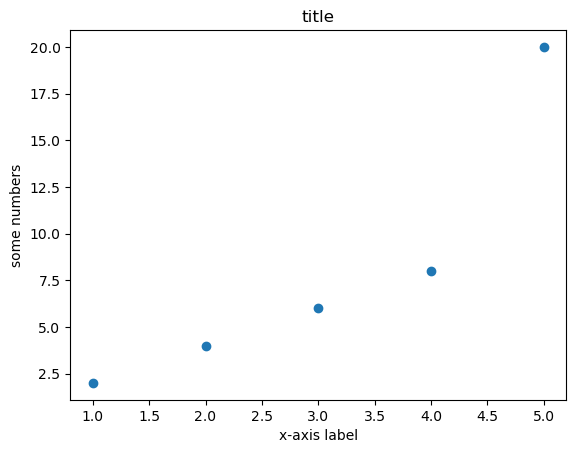

In [2]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,6,8,20]
plt.scatter(x, y)
plt.title('title')
plt.ylabel('some numbers')
plt.xlabel('x-axis label')
plt.show()

## Visualization best practices

Consult Wilke's _Fundamentals of Data Visualization_ https://clauswilke.com/dataviz/ for discussions of theory and best practices. 

The **goal of data visualization** is to accurately communicate _something_ about the data. This could be an amount, a distribution, relationship, predictions, or the results of sorted data.

Utilize characteristics of different data types to manipulate the aesthetics of plot axes and coordinate systems, color scales and gradients, and formatting and arrangements to impress your audience!

![wilke](img/wilke.png)

![wilke12](img/wilke12.png)

## Plotting with seaborn

### Basic plots

1. Histogram: visualize distribution of one (or more) continuous (i.e., integer or float) variable.

2. Boxplot: visualize the distribution of one (or more) continuous variable.

3. Scatterplot: visualize the relationship between two continuous variables. 

Study the seaborn tutorial for more examples and formatting options: https://seaborn.pydata.org/tutorial/function_overview.html

## Histogram

Use a histogram to plot the distribution of one continuous (i.e., integer or float) variable. 

In [3]:
# load gapminder dataset
# !wget -P data/ https://raw.githubusercontent.com/EastBayEv/SSDS-TAML/main/fall2022/data/gapminder-FiveYearData.csv
gap = pd.read_csv("data/gapminder-FiveYearData.csv")
gap.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


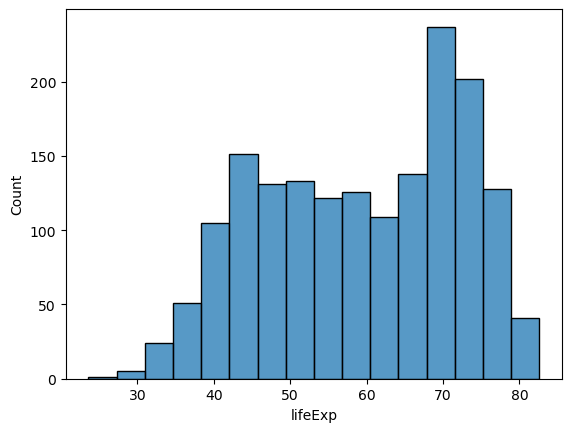

In [4]:
# all data
sns.histplot(data = gap,
            x = 'lifeExp'); 

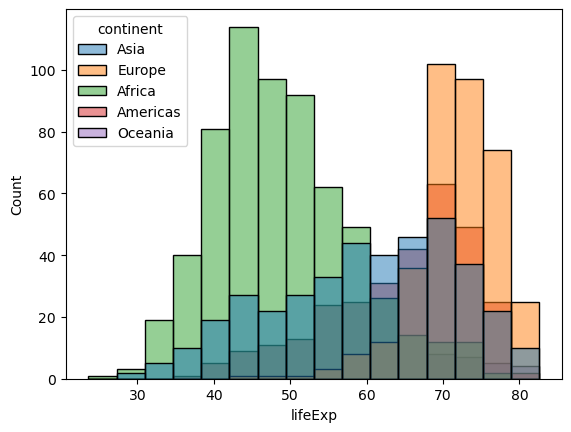

In [5]:
# by continent
sns.histplot(data = gap, 
            x = 'lifeExp', 
            hue = 'continent');

## Boxplot

Boxplots can be used to visualize one distribution as well, and illustrate different aspects of the table of summary statistics.

In [6]:
# summary statistics
gap.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


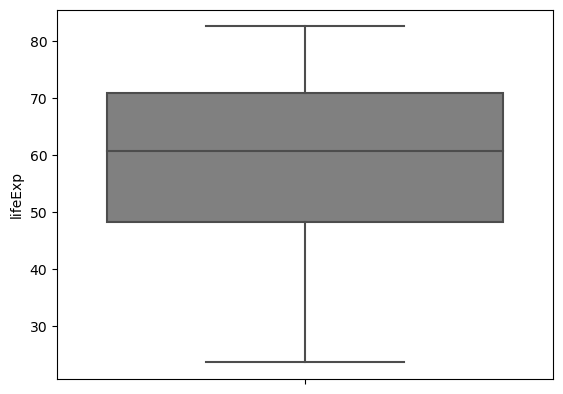

In [7]:
# all data
sns.boxplot(data = gap,
            y = 'lifeExp', 
            color = 'gray');

In [8]:
gap.groupby('continent').count()['country']

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [9]:
# Sums to the total number of observations in the dataset
sum(gap.groupby('continent').count()['country'])

1704

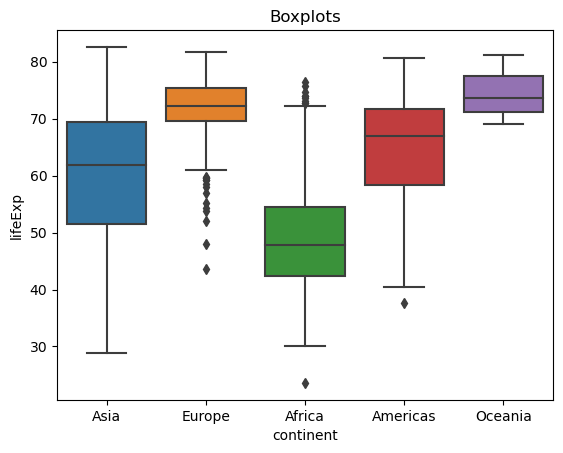

In [10]:
# by continent
sns.boxplot(data = gap,
            x = 'continent', 
            y = 'lifeExp').set_title('Boxplots');

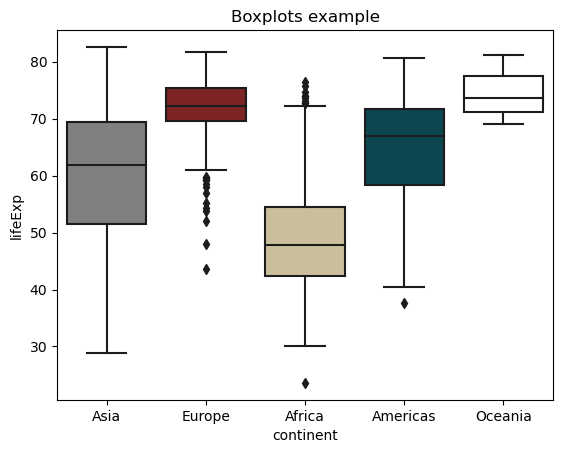

In [11]:
# custom colors
sns.boxplot(data = gap, 
            x = 'continent', 
            y = 'lifeExp', 
            palette = ['gray', '#8C1515', '#D2C295', '#00505C', 'white']).set_title('Boxplots example');

## Scatterplot

Scatterplots are useful to illustrate the relationship between two continuous variables. Below are several options for you to try.

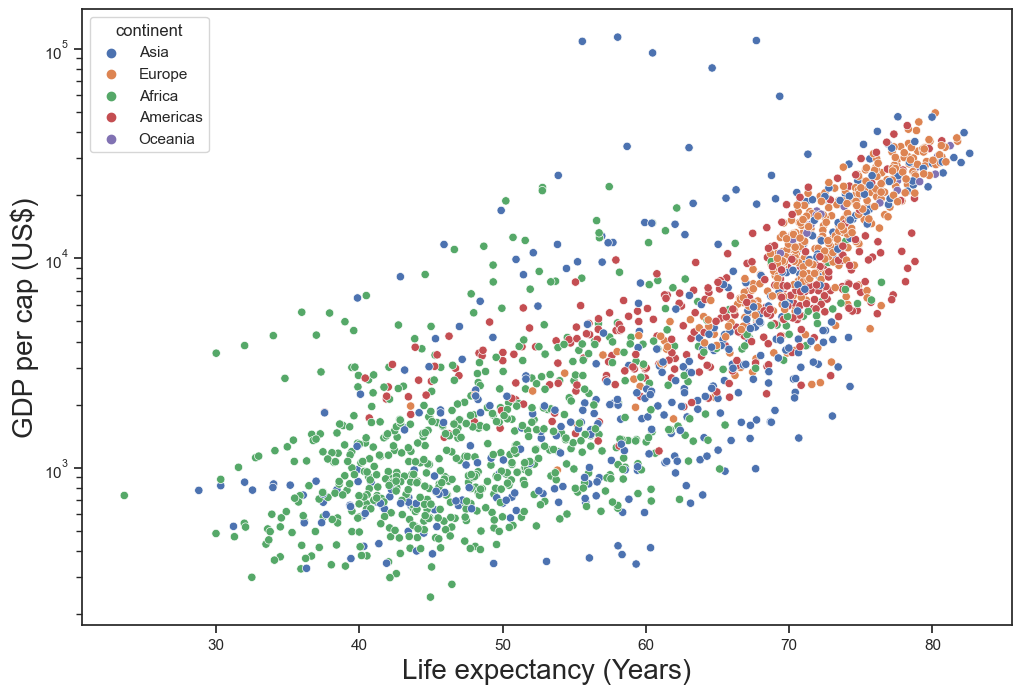

In [12]:
### change figure size
sns.set(rc = {'figure.figsize':(12,8)})

### change background
sns.set_style("ticks")

# commented code
ex1 = sns.scatterplot(
    
    # dataset
    data = gap,
    
    # x-axis variable to plot
    x = 'lifeExp', 
    
    # y-axis variable to plot
    y = 'gdpPercap', 
    
    # color points by categorical variable
    hue = 'continent', 
    
    # point transparency
    alpha = 1)

### log scale y-axis
ex1.set(yscale="log")

### set axis labels
ex1.set_xlabel("Life expectancy (Years)", fontsize = 20)
ex1.set_ylabel("GDP per cap (US$)", fontsize = 20);

### unhashtag to save 
### NOTE: this might only work on local Python installation and not JupyterLab - try it!

# plt.savefig('img/scatter_gap.pdf')

## Exercises - Penguins dataset

Learn more about the biological and spatial characteristics of penguins! 

1. Use seaborn to make a scatterplot of two continuous variables. Color each point by species. 
2. Make the same scatterplot as #1 above. This time, color each point by sex. 
3. Make the same scatterplot as #1 above again. This time color each point by island.
4. Use the `sns.FacetGrid` method to make faceted plots to examine "flipper_length_mm" on the x-axis, and "body_mass_g" on the y-axis. 

![penguins](img/penguins.png)

## Visualizations as an inferential tool

Below is a map of Antarctica past the southernmost tip of the South American continent. 

The distance from the Biscoe Islands (Renaud) to the Torgersen and Dream Islands is about 140 km. 

Might you suggest any similarities or differences between the penguins from these three locations? 

![antarctica](img/antarctica.png)

## Exercises - Gapminder dataset

1. Figure out how to make a line plot that shows gdpPercap through time. 
2. Figure out how to make a second line plot that shows lifeExp through time. 
3. How can you plot gdpPercap with a different colored line for each continent? 
4. Plot lifeExp with a different colored line for each continent. 

## What does this all mean for machine learning and text data?

You might be wondering what this all means for machine learning and text data! Oftentimes we are concerned sorting data, predicting something, the amounts of words (and their synonyms) being used, or with calculating scores between words. As you will see in the next chapters, we do not change text to numbers, but we do change the _representation_ of text to numbers. Read Chapter 6 "Core machine learning concepts; building text vocabularies" and Chapter 7 "English text preprocessing basics" to learn more!